#Sentiment Analysis

Sentiment Analysis, also known as opinion mining, is a natural language processing (NLP) task that involves determining the sentiment or emotional tone expressed in a piece of text. The goal is to understand the writer's attitude, opinion, or emotion conveyed in the text. Sentiment Analysis is commonly applied to social media comments, product reviews, news articles, and customer feedback.



Here are the key steps involved in Sentiment Analysis:

**1.  Text Preprocessing:**

Tokenization: Break the text into individual words or tokens.
Lowercasing: Convert all words to lowercase to ensure uniformity.
Removing Stopwords: Eliminate common words that don't carry much sentiment (e.g., "and," "the," "is").
Removing Punctuation: Strip away unnecessary punctuation marks.
Feature Extraction:

Convert the preprocessed text into a numerical representation that can be used as input for machine learning models.
Common techniques include Bag-of-Words (BoW), Term Frequency-Inverse Document Frequency (TF-IDF), or word embeddings like Word2Vec or GloVe.
Model Selection:

**2. Choose a machine learning or deep learning model** for sentiment analysis. Common choices include:
Naive Bayes: Simple probabilistic model suitable for text classification tasks.
Support Vector Machines (SVM): Effective for binary and multiclass classification tasks.
Recurrent Neural Networks (RNN): Effective for capturing sequential dependencies in text.
Transformer Models (e.g., BERT, GPT): State-of-the-art models that have achieved excellent performance on various NLP tasks.

**3. Training the Model:**

If using supervised learning, train the model on a labeled dataset where each text sample is associated with its sentiment label (positive, negative, neutral).
Fine-tune the model parameters to achieve optimal performance.
Evaluation:

**4. Assess the model's performance** on a separate test dataset using metrics like accuracy, precision, recall, and F1 score.
Inference:

**5. Apply the trained model** to analyze the sentiment of new, unseen text.


**6. Post-Processing:**

Depending on the application, you may perform post-processing steps to enhance the model's predictions, such as threshold adjustment or incorporating domain-specific rules.
Handling Imbalanced Data:

Address issues related to imbalanced datasets by employing techniques like oversampling, undersampling, or using class weights during training.

**Integar encoding**

Integer encoding is a common technique to convert textual data into a numerical format that can be fed into machine learning models.

In [1]:
import numpy as np

Basic preprocessing example.

In [2]:
docs=['go india',
      'india india',
      'hi hip hurray',
      'inqulib zindabad',
      'Bharat Mata ki jai',
      'Do or die',
      'leave our country']

In [3]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(oov_token='<nothing>')

In [7]:
tokenizer.fit_on_texts(docs)

In [9]:
tokenizer.word_index

{'<nothing>': 1,
 'india': 2,
 'go': 3,
 'hi': 4,
 'hip': 5,
 'hurray': 6,
 'inqulib': 7,
 'zindabad': 8,
 'bharat': 9,
 'mata': 10,
 'ki': 11,
 'jai': 12,
 'do': 13,
 'or': 14,
 'die': 15,
 'leave': 16,
 'our': 17,
 'country': 18}

In [10]:
 tokenizer.word_counts

OrderedDict([('go', 3),
             ('india', 9),
             ('hi', 3),
             ('hip', 3),
             ('hurray', 3),
             ('inqulib', 3),
             ('zindabad', 3),
             ('bharat', 3),
             ('mata', 3),
             ('ki', 3),
             ('jai', 3),
             ('do', 3),
             ('or', 3),
             ('die', 3),
             ('leave', 3),
             ('our', 3),
             ('country', 3)])

In [11]:
 tokenizer.document_count

21

In [12]:
sequences= tokenizer.texts_to_sequences(docs)
sequences

[[3, 2],
 [2, 2],
 [4, 5, 6],
 [7, 8],
 [9, 10, 11, 12],
 [13, 14, 15],
 [16, 17, 18]]

In [13]:
from keras.utils import pad_sequences

In [14]:
sequences= pad_sequences(sequences, padding='post')
sequences

array([[ 3,  2,  0,  0],
       [ 2,  2,  0,  0],
       [ 4,  5,  6,  0],
       [ 7,  8,  0,  0],
       [ 9, 10, 11, 12],
       [13, 14, 15,  0],
       [16, 17, 18,  0]], dtype=int32)

# Analysis on imdb dataset

In [16]:
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense, SimpleRNN, Embedding, Flatten

In [17]:
(x_train,y_train),(x_test,y_test)= imdb.load_data()

17464789/17464789 [==============================] - 0s 0us/step


In [18]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [19]:
x_train.shape, x_test.shape

((25000,), (25000,))

In [20]:
len(x_train[0]),len(x_train[1]),

(218, 189)

In [21]:
x_train= pad_sequences(x_train, padding='post',maxlen=100)
x_test= pad_sequences(x_test, padding='post',maxlen=100)

In [22]:
len(x_train[0]),len(x_train[20])

(100, 100)

In [23]:
model= Sequential()
model.add(SimpleRNN(32,input_shape=(100,1), return_sequences=False)) # return sequences will give output at every time step
model.add(Dense(1,activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1088      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
from keras.utils import plot_model

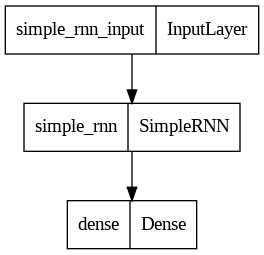

In [26]:
plot_model(model)

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
history=model.fit(x_train,y_train,epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
782/782 [==============================] - 65s 76ms/step - loss: 0.6950 - accuracy: 0.5066 - val_loss: 0.6940 - val_accuracy: 0.5052
Epoch 2/10
782/782 [==============================] - 67s 85ms/step - loss: 0.6933 - accuracy: 0.5128 - val_loss: 0.6923 - val_accuracy: 0.5079
Epoch 3/10
782/782 [==============================] - 57s 73ms/step - loss: 0.6932 - accuracy: 0.5090 - val_loss: 0.6950 - val_accuracy: 0.5096
Epoch 4/10
782/782 [==============================] - 53s 67ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6924 - val_accuracy: 0.5135
Epoch 5/10
782/782 [==============================] - 60s 77ms/step - loss: 0.6924 - accuracy: 0.5164 - val_loss: 0.6925 - val_accuracy: 0.5070
Epoch 6/10
782/782 [==============================] - 52s 67ms/step - loss: 0.6924 - accuracy: 0.5132 - val_loss: 0.6953 - val_accuracy: 0.5114
Epoch 7/10
782/782 [==============================] - 60s 77ms/step - loss: 0.6923 - accuracy: 0.5112 - val_loss: 0.6934 - val_accuracy:

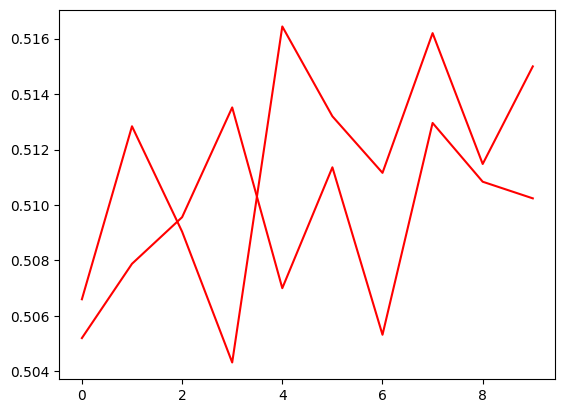

In [30]:
# Plot Trainning accurcy and Validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red',label='Train')
plt.plot(history.history['val_accuracy'], color='red',label='Test')

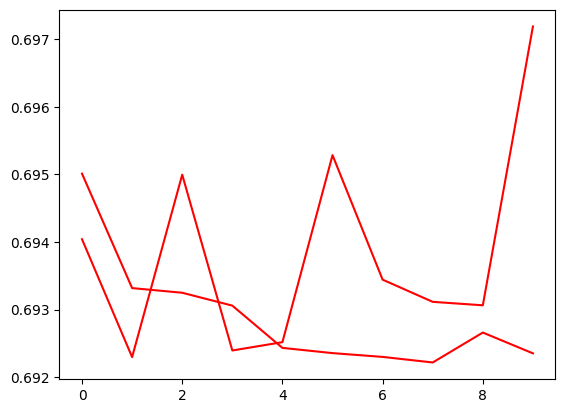

In [31]:
# Plot Trainning loss and Validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red',label='Train')
plt.plot(history.history['val_loss'], color='red',label='Test')

#**Embedding**
In natural language processing, word embedding is a term used for the representation of words for text analysis, typically in the form of a rela-valued vectors that encodes the meaning of the word such that the word that are closer in the vector space are expected to be similar in menaing.


1.   Dense Representation (Non-zero values -> less dimension)
2.   Semantic Meaning

e.g. Word2Vec, Glove

#DeepLearning-> Embedding learn-> Enbedding-> RNN-> Se4ntiment

In [32]:
docs=['go india',
      'india india',
      'hi hip hurray',
      'inqulib zindabad',
      'Bharat Mata ki jai',
      'Do or die',
      'leave our country']

In [33]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(oov_token='<nothing>')

In [34]:
tokenizer.fit_on_texts(docs)

In [35]:
tokenizer.word_index

{'<nothing>': 1,
 'india': 2,
 'go': 3,
 'hi': 4,
 'hip': 5,
 'hurray': 6,
 'inqulib': 7,
 'zindabad': 8,
 'bharat': 9,
 'mata': 10,
 'ki': 11,
 'jai': 12,
 'do': 13,
 'or': 14,
 'die': 15,
 'leave': 16,
 'our': 17,
 'country': 18}

In [36]:
sequences= tokenizer.texts_to_sequences(docs)
sequences

[[3, 2],
 [2, 2],
 [4, 5, 6],
 [7, 8],
 [9, 10, 11, 12],
 [13, 14, 15],
 [16, 17, 18]]

In [37]:
from keras.utils import pad_sequences
sequences= pad_sequences(sequences, padding='post')
sequences

array([[ 3,  2,  0,  0],
       [ 2,  2,  0,  0],
       [ 4,  5,  6,  0],
       [ 7,  8,  0,  0],
       [ 9, 10, 11, 12],
       [13, 14, 15,  0],
       [16, 17, 18,  0]], dtype=int32)

In [39]:
# Create model
model= Sequential()
model.add(Embedding(18,output_dim=2, input_length=4))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4, 2)              36        
                                                                 
Total params: 36 (144.00 Byte)
Trainable params: 36 (144.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model.compile('adam','accuracy')

In [41]:
pred= model.predict(sequences)
print(pred)


1/1 [==============================] - 0s 119ms/step
[[[-0.04211763 -0.01568152]
  [-0.04343256  0.0127246 ]
  [-0.03099253  0.00968466]
  [-0.03099253  0.00968466]]

 [[-0.04343256  0.0127246 ]
  [-0.04343256  0.0127246 ]
  [-0.03099253  0.00968466]
  [-0.03099253  0.00968466]]

 [[ 0.02255427 -0.03494356]
  [-0.0463467   0.03644915]
  [-0.01205944  0.04719948]
  [-0.03099253  0.00968466]]

 [[-0.03676801 -0.02124045]
  [ 0.03215841  0.03253562]
  [-0.03099253  0.00968466]
  [-0.03099253  0.00968466]]

 [[-0.01918273  0.01851625]
  [ 0.03242003  0.0469849 ]
  [ 0.03565617  0.00842013]
  [-0.04878597 -0.01841431]]

 [[ 0.03972277  0.00390495]
  [-0.01485838 -0.02751511]
  [ 0.01600834  0.01908607]
  [-0.03099253  0.00968466]]

 [[-0.04806769  0.01264209]
  [ 0.03097636 -0.00843395]
  [ 0.          0.        ]
  [-0.03099253  0.00968466]]]


#RNN Model with emmddeing layer for Sentiment analysis

In [42]:
# Create RNN model
model= Sequential()
model.add(Embedding(25000,output_dim=2, input_length=100))
model.add(SimpleRNN(32, return_sequences=False)) # return sequences will give output at every time step
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 2)            50000     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                1120      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 51153 (199.82 KB)
Trainable params: 51153 (199.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
from keras.utils import plot_model

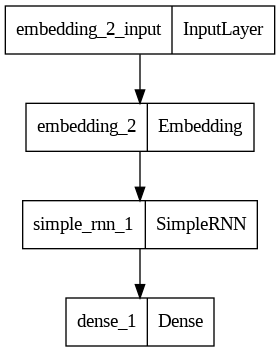

In [44]:
plot_model(model)

In [45]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
782/782 [==============================] - 111s 140ms/step - loss: 0.6757 - accuracy: 0.5679 - val_loss: 0.4906 - val_accuracy: 0.7788
Epoch 2/10
782/782 [==============================] - 87s 111ms/step - loss: 0.4165 - accuracy: 0.8159 - val_loss: 0.3787 - val_accuracy: 0.8330
Epoch 3/10
782/782 [==============================] - 84s 108ms/step - loss: 0.2925 - accuracy: 0.8846 - val_loss: 0.4027 - val_accuracy: 0.8329
Epoch 4/10
782/782 [==============================] - 81s 104ms/step - loss: 0.2222 - accuracy: 0.9190 - val_loss: 0.4312 - val_accuracy: 0.8275
Epoch 5/10
782/782 [==============================] - 82s 105ms/step - loss: 0.1783 - accuracy: 0.9376 - val_loss: 0.4756 - val_accuracy: 0.8284
Epoch 6/10
782/782 [==============================] - 81s 104ms/step - loss: 0.1425 - accuracy: 0.9519 - val_loss: 0.4689 - val_accuracy: 0.8306
Epoch 7/10
782/782 [==============================] - 81s 103ms/step - loss: 0.1175 - accuracy: 0.9618 - val_loss: 0.5307 - val_a

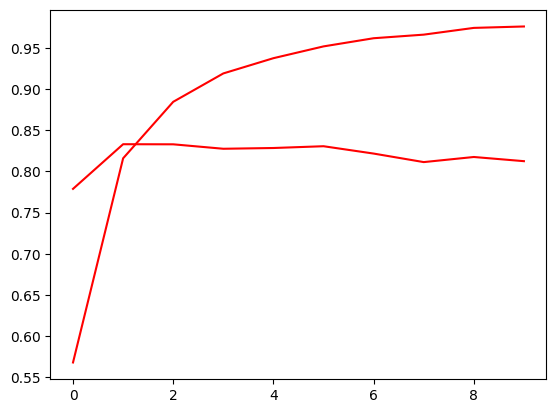

In [46]:
# Plot Trainning Accuracy and Validation Accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red',label='Train')
plt.plot(history.history['val_accuracy'], color='red',label='Test')

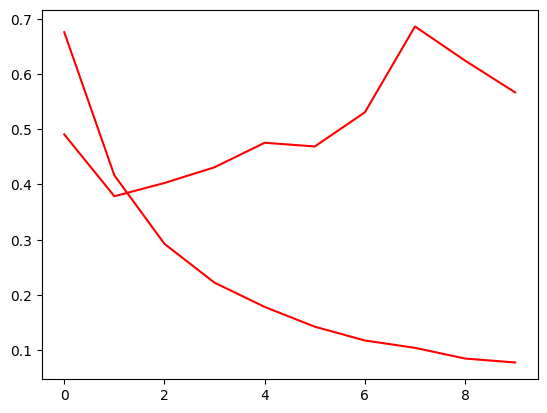

In [47]:
# Plot Trainning loss and Validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red',label='Train')
plt.plot(history.history['val_loss'], color='red',label='Test')

In [66]:
x=['Movie is bad']


In [67]:
tokenizer=Tokenizer(oov_token='<nothing>')
tokenizer.fit_on_texts(x)


In [68]:
tokenizer.word_index

{'<nothing>': 1, 'movie': 2, 'is': 3, 'bad': 4}

In [69]:
sequences= tokenizer.texts_to_sequences(x)
sequences

[[2, 3, 4]]

In [70]:
sequences= pad_sequences(sequences,padding='pre', maxlen=100)
sequences

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4]], dtype=int32)

In [71]:
model.predict(sequences)

1/1 [==============================] - 0s 24ms/step


array([[0.8528647]], dtype=float32)

**Challenges in Sentiment Analysis:**

arcasm and Irony: Detecting sarcastic or ironic expressions can be challenging.

Contextual Understanding: Understanding sentiment often requires considering the context in which the text is written.

Negation: Identifying negations is crucial as they can completely reverse the sentiment.